In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = np.loadtxt("C7_yaw.txt")

In [3]:
print(data)

[-68.333 -68.337 -68.338 ...,  62.1    63.349  64.117]


In [4]:
time = np.ones_like(data)
print(time)

[ 1.  1.  1. ...,  1.  1.  1.]


In [5]:
print(np.shape(time))

(187498,)


In [52]:
time = np.ones_like(data)
k = 0
j = 1/41
while k < 187498:
    time[k] = time[k]*k*j/60/60
    w = k
    k+=1
print(w)

187497


In [53]:
print(time)

[  0.00000000e+00   6.77506775e-06   1.35501355e-05 ...,   1.27029133e+00
   1.27029810e+00   1.27030488e+00]


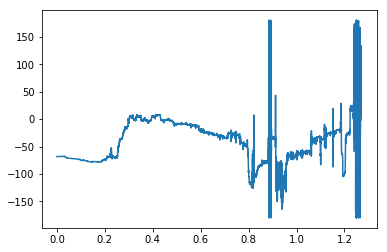

In [54]:
plt.plot(time,data)

In [68]:
i=0
n=0
wait = 1
waiting_time = 0
data_continuous = np.ones_like(data)
while n < 187498:
    if wait == 1:
        waiting_time+=1
    if waiting_time == 10000:
        wait = 0
    if n == 10600:
        wait = 1
        waiting_time = 0 
    if n == 40000:
        wait = 1
        waiting_time = 0 
    if n == 50000:
        wait = 1
        waiting_time = 0
    if n == 60000:
        wait = 1
        waiting_time = 0 
    if n == 120000:
        wait = 1
        waiting_time = 0 
    if n == 130000:
        wait = 1
        waiting_time = 0 
    if n == 160000:
        wait = 1
        waiting_time = 0 
    if n == 170000:
        wait = 1
        waiting_time = 0 
    if n == 180000:
        wait = 1
        waiting_time = 0 
    if data[n-1] > 0 and data[n] < 0 and wait == 0:
        i+=1
        wait = 1
        waiting_time = 0
    data_continuous[n] = data[n]+i*360
    n+=1
print(data_continuous)

[-68.333 -68.337 -68.338 ...,  62.1    63.349  64.117]


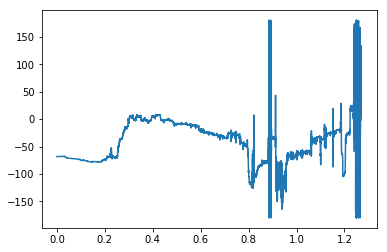

In [69]:
plt.plot(time, data_continuous)

In [70]:
print(data_continuous)

[-68.333 -68.337 -68.338 ...,  62.1    63.349  64.117]


In [71]:
print(data[1])

-68.337


In [72]:
import scipy.optimize

In [73]:
i = 0
while i < 137369:
    if np.isnan(data_continuous[i]) == True:
        print(i)
    i+=1
print(i)

137369


In [74]:
#np.isnan(data_continuous).any()
#np.isnan(time).any()

#np.isinf(data_continuous).any()
np.isinf(time).any()

False

In [75]:
def drift(x, a,b, c, d,e):
    return a*np.exp(d*x)+e*x**b+c

In [76]:
r = scipy.optimize.curve_fit(drift, time, data_continuous)
print(r)

C:\Users\mjordan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in power
  from ipykernel import kernelapp as app
C:\Users\mjordan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app
C:\Users\mjordan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app


(array([ -1.81678692e+00,   4.18134930e-08,  -8.02940097e+00,
         1.00493423e+00,  -6.06306573e+00]), array([[  3.53667844e+00,   2.42425851e-02,  -3.53613458e+00,
          1.06455457e+00,  -7.33215731e-01],
       [  2.42425851e-02,   5.07014643e-04,  -2.42448669e-02,
          6.62905471e-03,  -8.47481835e-03],
       [ -3.53613458e+00,  -2.42448669e-02,   1.98606728e+03,
         -1.06440592e+00,  -1.98179867e+03],
       [  1.06455457e+00,   6.62905471e-03,  -1.06440592e+00,
          3.23689437e-01,  -2.08429647e-01],
       [ -7.33215731e-01,  -8.47481835e-03,  -1.98179867e+03,
         -2.08429647e-01,   1.98274492e+03]]))


In [77]:
(a,b, c, d,e) = r[0]
print(a,b,c, d,e)

-1.81678691504 4.18134929732e-08 -8.02940096549 1.00493423176 -6.06306573001


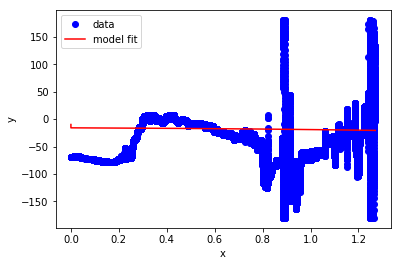

In [78]:
plt.plot(time, data_continuous, linestyle='' , marker='o', color='blue', label='data')
plt.plot(time, drift(time, a, b, c, d,e), linestyle='-', color='red' , label='model fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='upper left')


In [79]:
data_no_drift = data_continuous - drift(time,a,b,c,d,e)

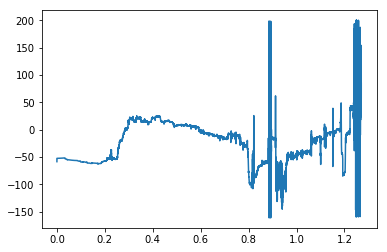

In [80]:
plt.plot(time,data_no_drift)